# **Phishing Website Detection using Machine Learning**

## **1. Loading Dataset**

The features are extracted and stored in a csv file. The extraction process is
explained in the `Feature Extraction.ipynb` file.

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('url_dataset.csv')
df.head()

,url,url_length,domain_length,path_depth,nb_subdomains,https_in_hostname,shortened_url,abnormal_subdomain,suspicious_tld,is_ip,...,unregistered_domain,domain_age,domain_end,unavailable_dns_record,page_rank,nb_redirects,nb_external_redirects,domain_not_in_title,domain_without_copyright,status
0,http://www.crestonwood.com/router.php,37,11,1,1,0,0,0,0,0,...,0,0,45,1,4,0,0,0,1,0
1,http://shadetreetechnology.com/V4/validation/a...,77,19,3,1,0,0,0,0,0,...,0,5767,77,0,2,1,0,1,0,1
2,https://support-appleld.com.secureupdate.duila...,126,13,2,3,0,0,0,0,0,...,0,4004,14,0,0,1,0,1,0,1
3,http://rgipt.ac.in,18,5,0,1,0,0,0,0,0,...,0,0,62,0,3,1,0,1,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,7,2,1,0,0,0,0,0,...,0,8175,224,0,6,1,0,0,1,0


## **2. Familiarizing with Data**

In [3]:
# Shape of the dataset
df.shape

(11430, 26)

In [4]:
# Feature names
df.columns

Index(['url', 'url_length', 'domain_length', 'path_depth', 'nb_subdomains',
       'https_in_hostname', 'shortened_url', 'abnormal_subdomain',
       'suspicious_tld', 'is_ip', 'is_http', 'has_at', 'has_dash',
       'has_double_slash', 'nb_equals', 'nb_question_mark',
       'unregistered_domain', 'domain_age', 'domain_end',
       'unavailable_dns_record', 'page_rank', 'nb_redirects',
       'nb_external_redirects', 'domain_not_in_title',
       'domain_without_copyright', 'status'],
      dtype='object')

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   url                       11430 non-null  object
 1   url_length                11430 non-null  int64 
 2   domain_length             11430 non-null  int64 
 3   path_depth                11430 non-null  int64 
 4   nb_subdomains             11430 non-null  int64 
 5   https_in_hostname         11430 non-null  int64 
 6   shortened_url             11430 non-null  int64 
 7   abnormal_subdomain        11430 non-null  int64 
 8   suspicious_tld            11430 non-null  int64 
 9   is_ip                     11430 non-null  int64 
 10  is_http                   11430 non-null  int64 
 11  has_at                    11430 non-null  int64 
 12  has_dash                  11430 non-null  int64 
 13  has_double_slash          11430 non-null  int64 
 14  nb_equals             

The `url` column contains the URL of the website. This is irrelevant for the
model, so it can be removed.

In [11]:
# Remove the "url" column
df.drop(['url'], axis=1, inplace=True)

## **3. Visualizing the Data**

Few plots to show the data distribution and the correlation between the features.

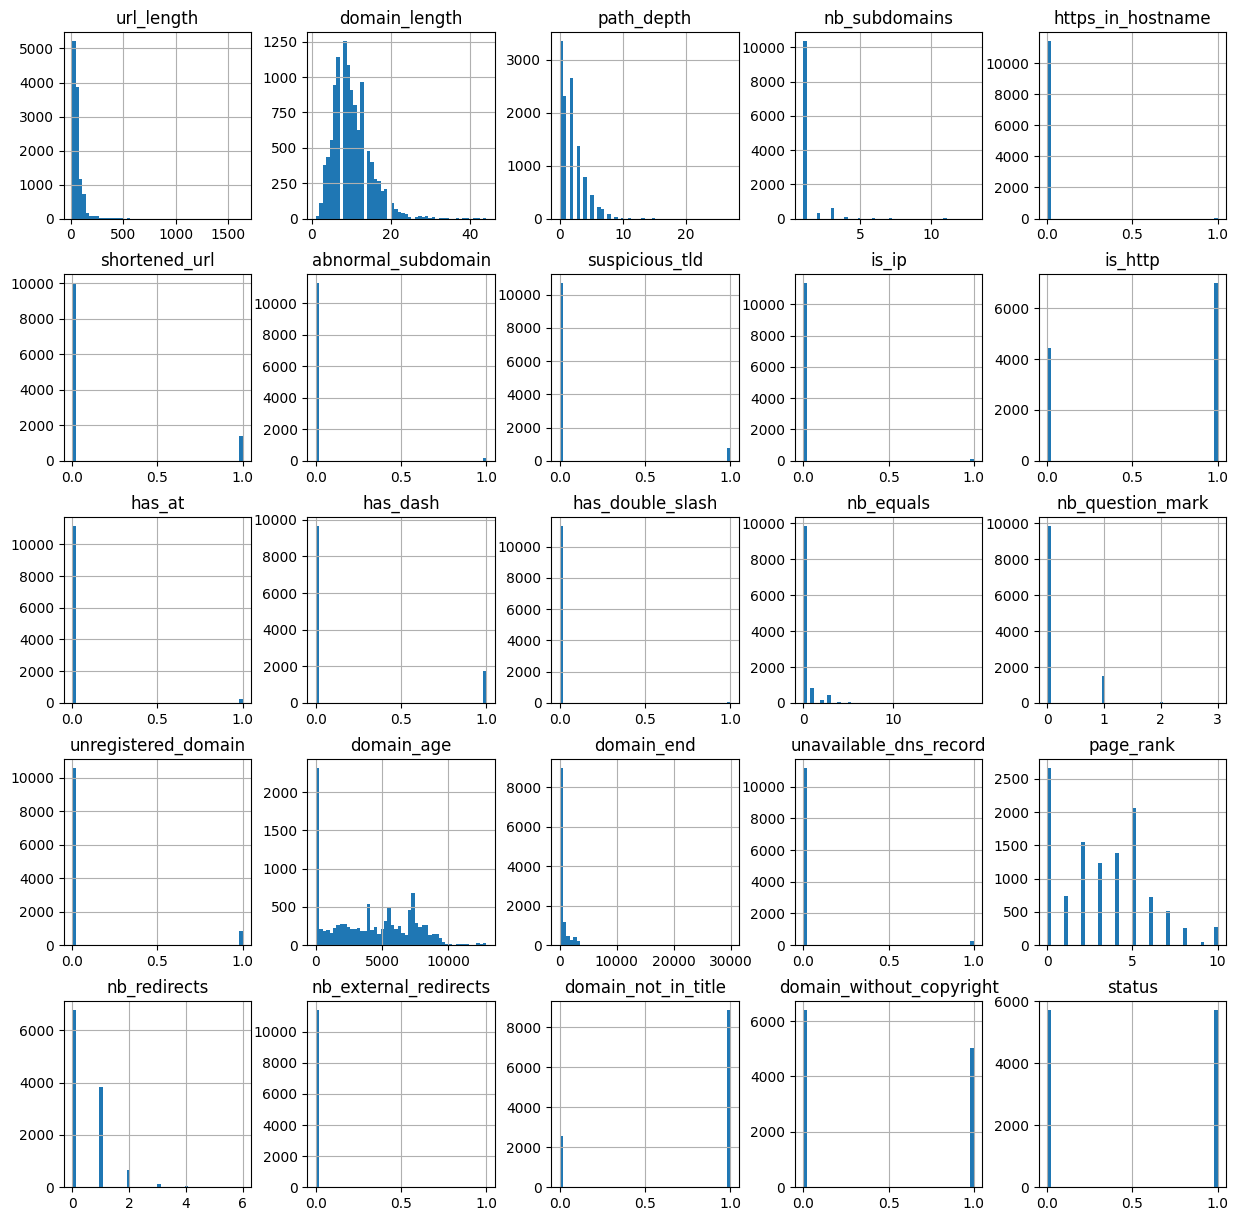

In [12]:
# Plot the distribution of all features
df.hist(figsize=(15, 15), bins=50)
plt.show()

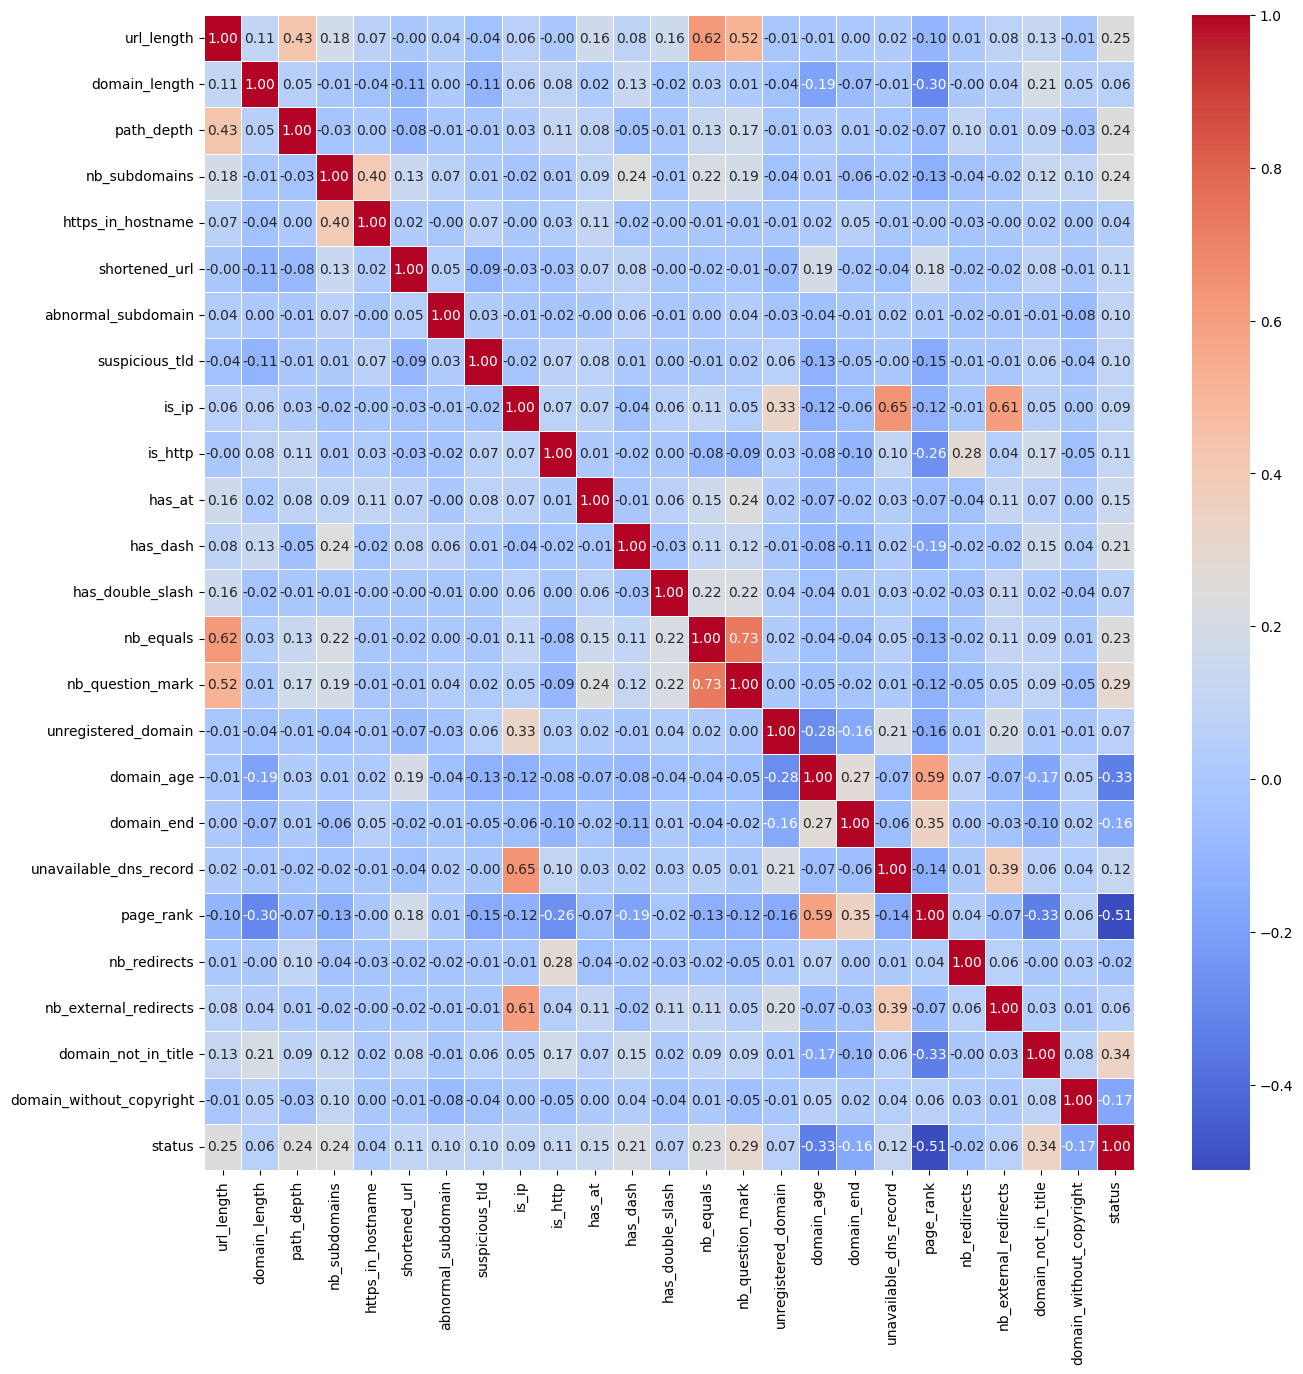

In [13]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

## **4. Data Preprocessing & EDA**

Here, the data is cleaned by applying data preprocessing techniques and perform exploratory data analysis (EDA) to gain insights into the dataset.

In [14]:
df.describe()

,url_length,domain_length,path_depth,nb_subdomains,https_in_hostname,shortened_url,abnormal_subdomain,suspicious_tld,is_ip,is_http,...,unregistered_domain,domain_age,domain_end,unavailable_dns_record,page_rank,nb_redirects,nb_external_redirects,domain_not_in_title,domain_without_copyright,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.120035,10.103587,1.829746,1.184864,0.001312,0.124497,0.014873,0.065354,0.008486,0.610936,...,0.072878,4062.710236,492.53622,0.020122,3.185739,0.498250,0.003150,0.775853,0.439545,0.500000
std,55.292470,4.632277,1.887386,0.688161,0.036204,0.330162,0.121050,0.247161,0.091734,0.487559,...,0.259948,3107.566899,814.76698,0.140425,2.536955,0.691907,0.056035,0.417038,0.496353,0.500022
min,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,972.250000,84.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,47.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3993.000000,242.00000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.500000
75%,71.000000,13.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,7026.750000,449.00000,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1641.000000,44.000000,27.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,12874.000000,29829.00000,1.000000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the features are boolean, except for the following:
- `url_length`
- `domain_length`
- `path_depth`
- `nb_subdomains`
- `nb_equals`
- `nb_question_mark`
- `domain_age`
- `domain_end`
- `unavailable_dns_record`
- `page_rank`
- `nb_redirects`
- `nb_external_redirects`

As indicated above, the `url` column is not needed for the training.
So, it was removed.

Some features like `url_length` have outliers, but these outliers are not
errors. Phishing websites usually have long URLs, long domains, and long paths.
In the same way, legitimate websites have long domain ages and end periods.

All outliers make sense, so they are not removed.

In [15]:
# Check for missing values
df.isnull().sum()

url_length                  0
domain_length               0
path_depth                  0
nb_subdomains               0
https_in_hostname           0
shortened_url               0
abnormal_subdomain          0
suspicious_tld              0
is_ip                       0
is_http                     0
has_at                      0
has_dash                    0
has_double_slash            0
nb_equals                   0
nb_question_mark            0
unregistered_domain         0
domain_age                  0
domain_end                  0
unavailable_dns_record      0
page_rank                   0
nb_redirects                0
nb_external_redirects       0
domain_not_in_title         0
domain_without_copyright    0
status                      0
dtype: int64

The above result shows that there are no missing values in the dataset.

## **5. Splitting the Data**

Here, the data is split into training and testing sets. The training set is used
to train the model, while the testing set is used to evaluate the model's
performance.

In [16]:
# Separate the target and features
y = df['status']
X = df.drop(['status'], axis=1)
X.shape, y.shape

((11430, 24), (11430,))

In [17]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 24), (2286, 24), (9144,), (2286,))

## **6. Models & Training**

The supervised machine learning models considered to train the dataset are:

* Decision Tree
* Random Forest
* Multi-Layer Perceptron
* XGBoost
* Support Vector Machine
* Gaussian Naive Bayes

In [108]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# Holders
models = []
accuracy_train = []
accuracy_test = []
precision = []
recall = []
f1 = []


# Call to store results
def store_results(model, y_train_pred, y_test_pred):
    models.append(model)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred))
    recall.append(recall_score(y_test, y_test_pred))
    f1.append(f1_score(y_test, y_test_pred))

    print('Accuracy on training set: {:.2f}%'.format(accuracy_train[-1] * 100))
    print('Accuracy on test set: {:.2f}%'.format(accuracy_test[-1] * 100))

In [109]:
# Plots
def plot_feature_importances(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(15, 10))
    plt.barh(X.columns[indices], importances[indices])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


def plot_confusion_matrix(y_test, y_test_pred):
    labels = ['Legítimo', 'Phishing']
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### **6.1. Decision Tree**

In [110]:
# Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
# Predictions
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

In [112]:
# Compute and store the metrics
store_results('Decision Tree', y_train_pred, y_test_pred)

Accuracy on training set: 99.99%
Accuracy on test set: 92.48%


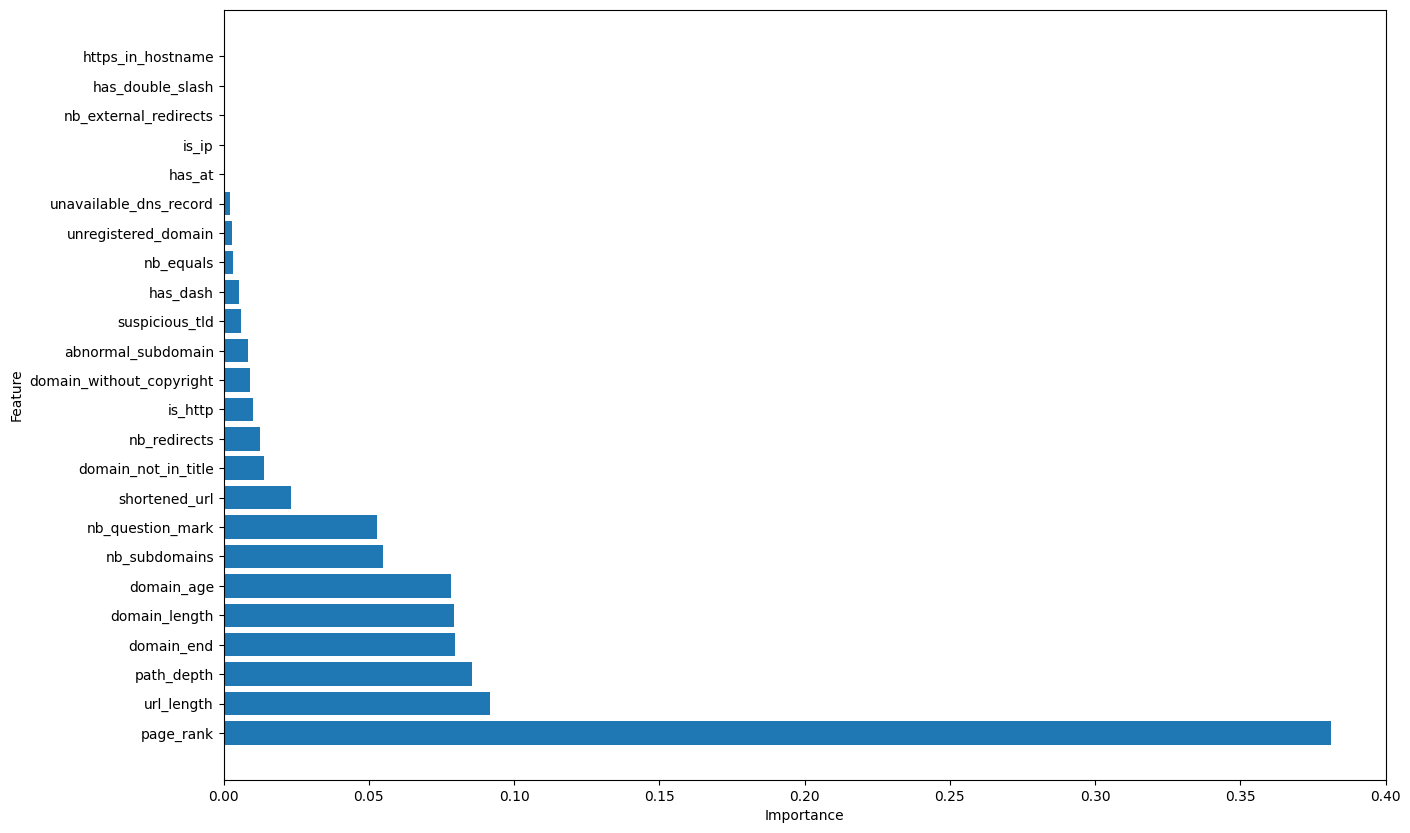

In [113]:
plot_feature_importances(dt, X_train)

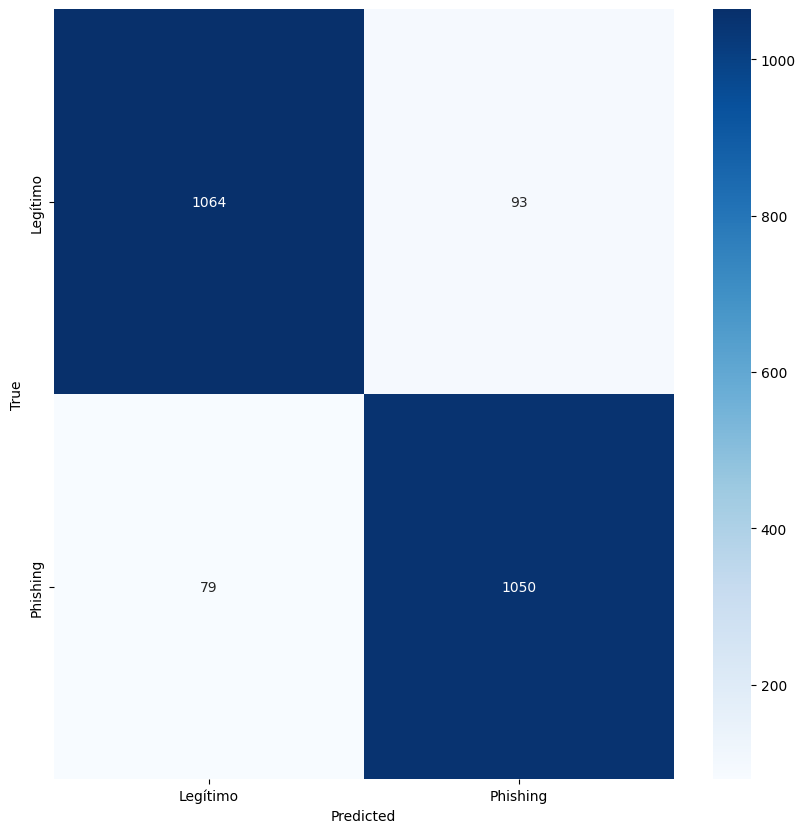

In [114]:
plot_confusion_matrix(y_test, y_test_pred)

### **6.2. Random Forest**

In [115]:
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
# Predictions
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [117]:
# Compute and store the metrics
store_results('Random Forest', y_train_pred, y_test_pred)

Accuracy on training set: 99.99%
Accuracy on test set: 94.44%


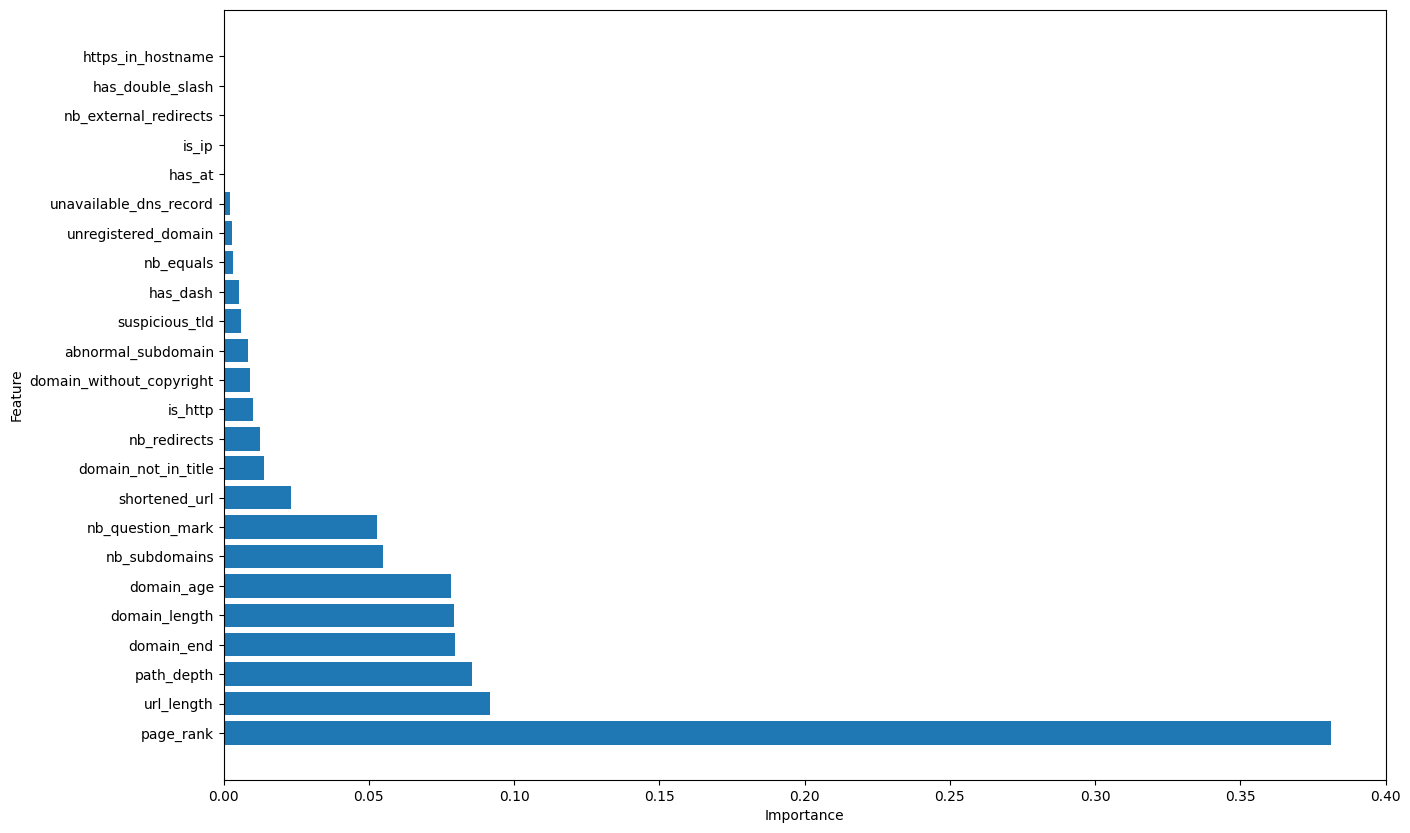

In [118]:
# Plot the feature importances
plot_feature_importances(dt, X_train)

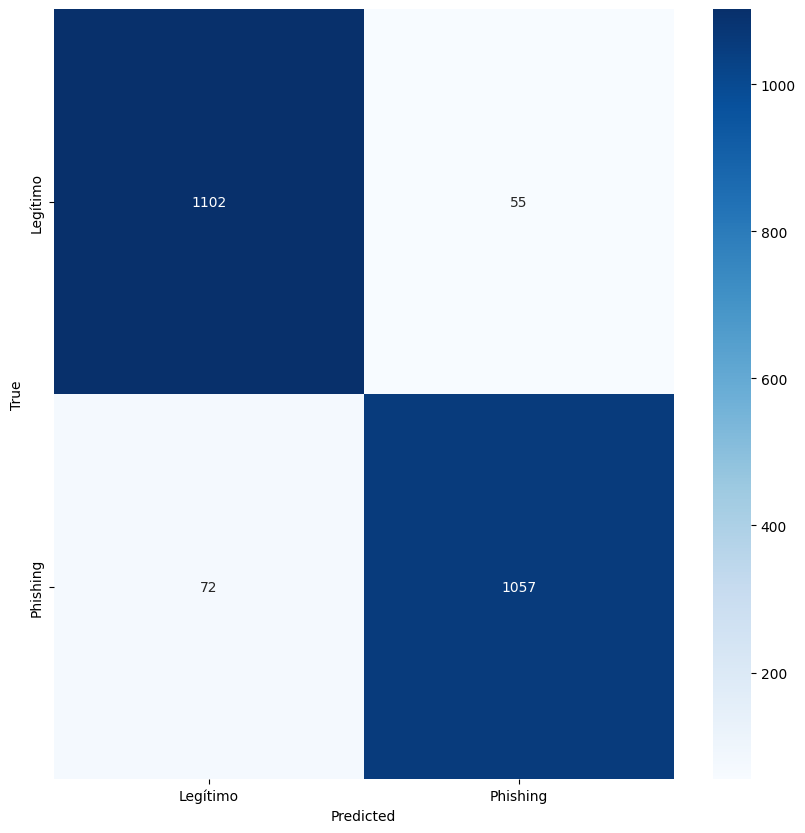

In [119]:
plot_confusion_matrix(y_test, y_test_pred)

### **6.3. Multi-Layer Perceptron**

In [120]:
# Train a multi-layer perceptron classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100))
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100))

In [121]:
# Predictions
y_test_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)

In [122]:
# Compute and store the metrics
store_results('Multi-Layer Perceptron', y_train_pred, y_test_pred)

Accuracy on training set: 77.46%
Accuracy on test set: 78.35%


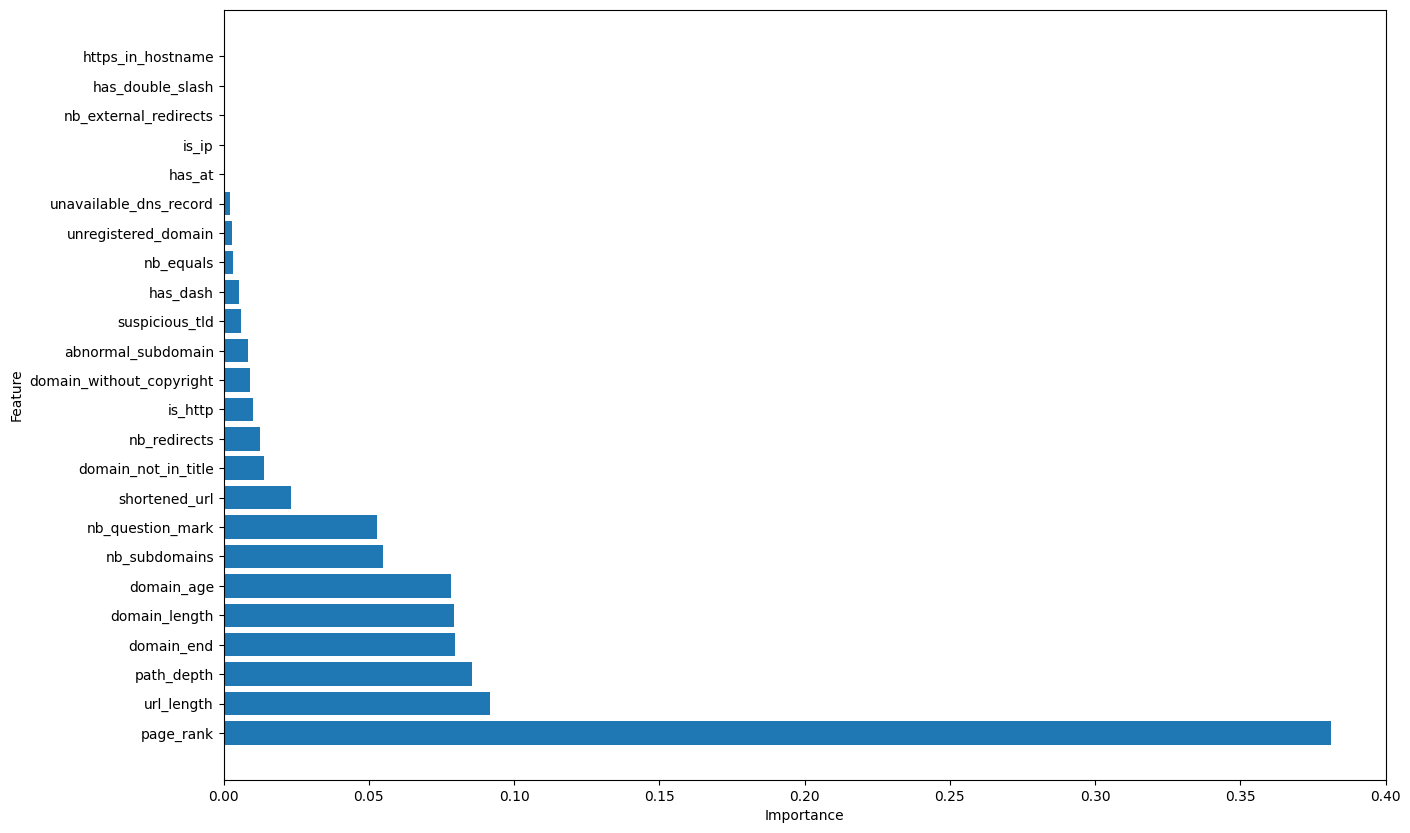

In [123]:
plot_feature_importances(dt, X_train)

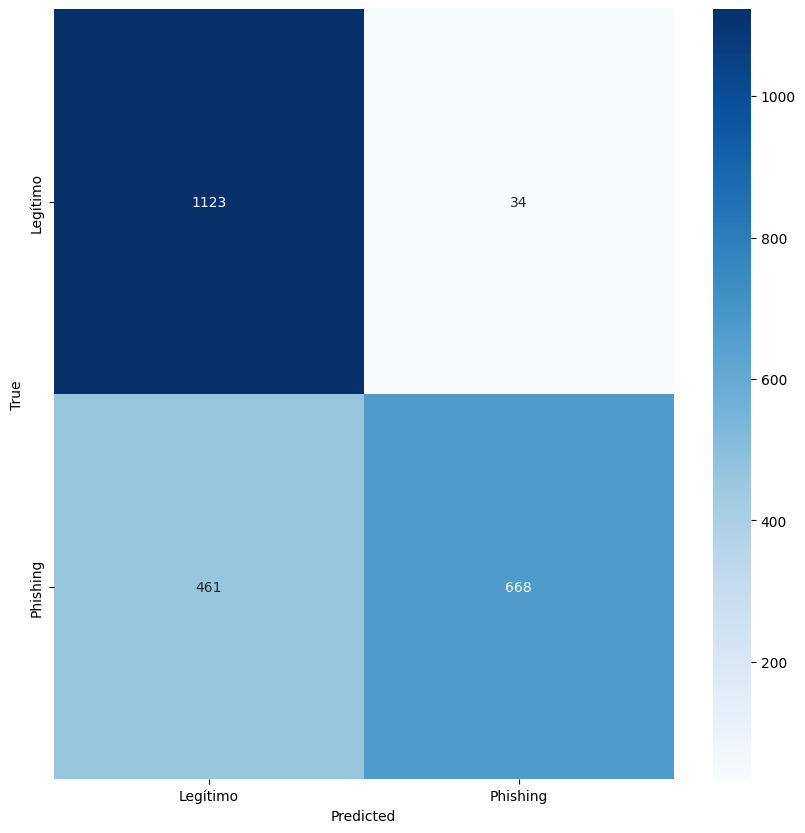

In [124]:
plot_confusion_matrix(y_test, y_test_pred)

### **6.4. XGBoost**

In [125]:
# Train a XGBoost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [126]:
# Predictions
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [127]:
# Compute and store the metrics
store_results('XGBoost', y_train_pred, y_test_pred)

Accuracy on training set: 98.65%
Accuracy on test set: 94.49%


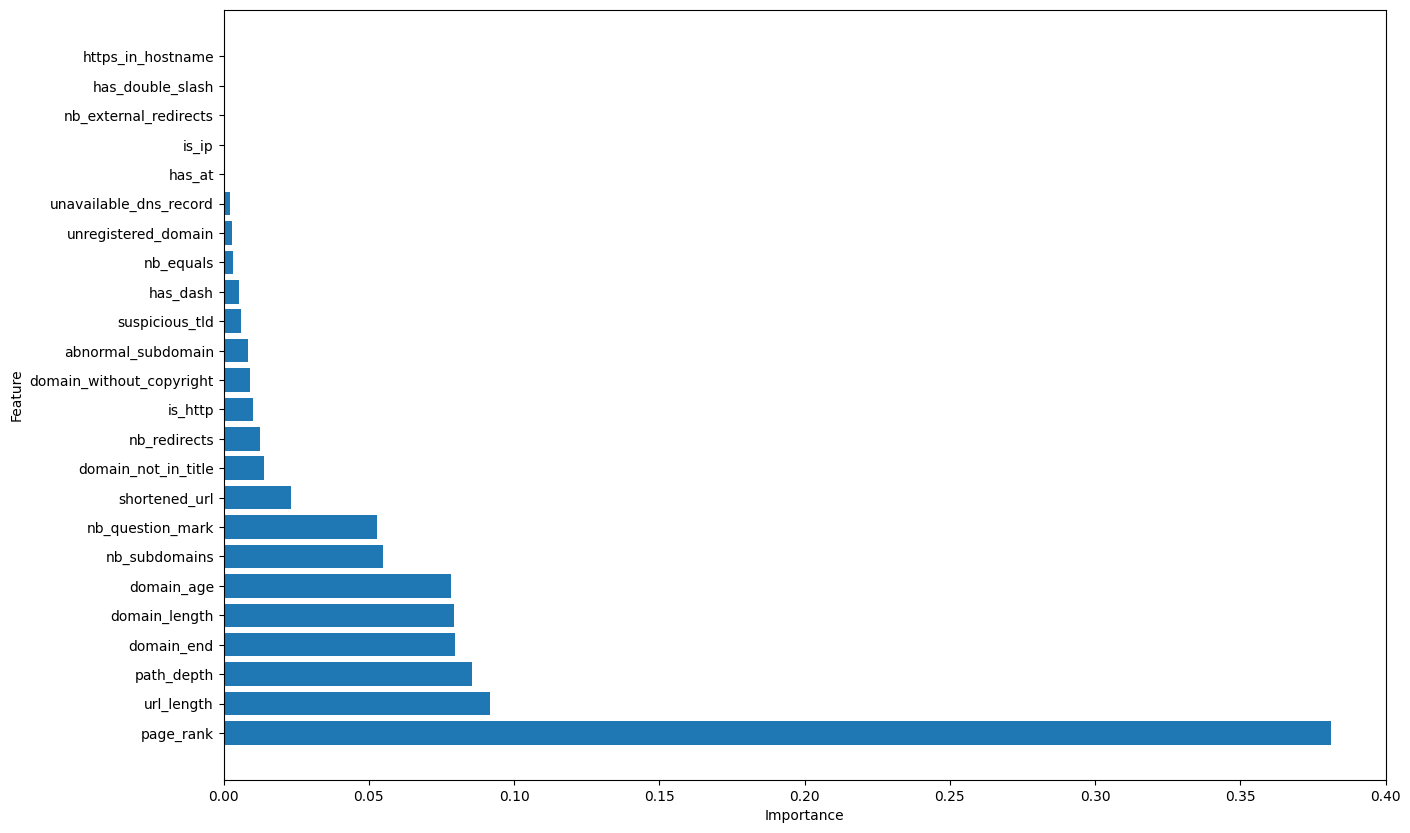

In [128]:
plot_feature_importances(dt, X_train)

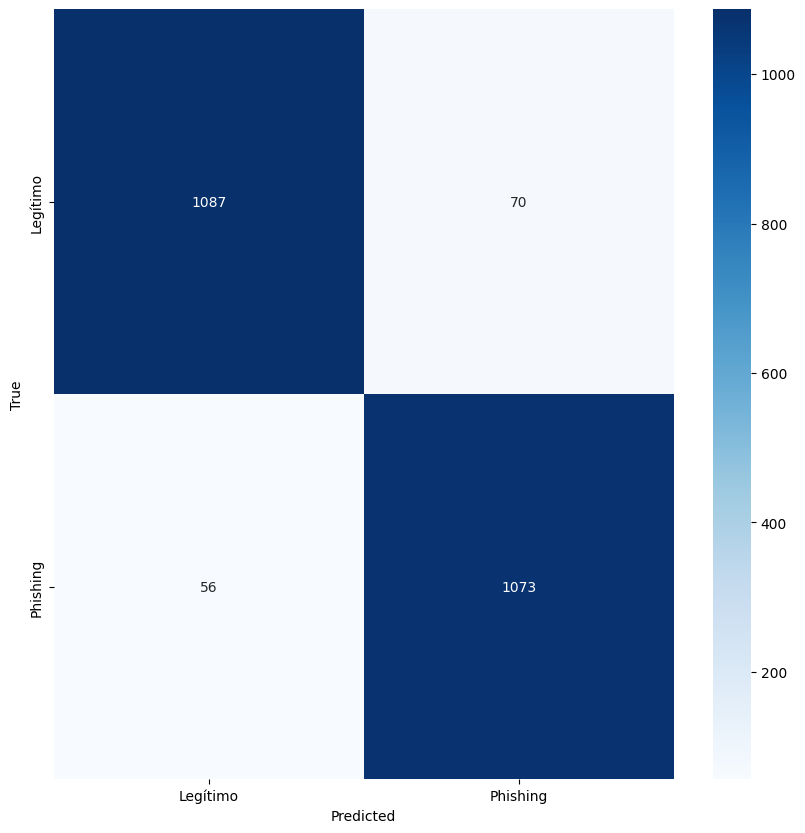

In [129]:
plot_confusion_matrix(y_test, y_test_pred)

### **6.5. Support Vector Machine (SVM)**

In [130]:
# Train a support vector machine classifier
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [131]:
# Predictions
y_test_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)

In [132]:
# Compute and store the metrics
store_results('SVM', y_train_pred, y_test_pred)

Accuracy on training set: 66.33%
Accuracy on test set: 66.58%


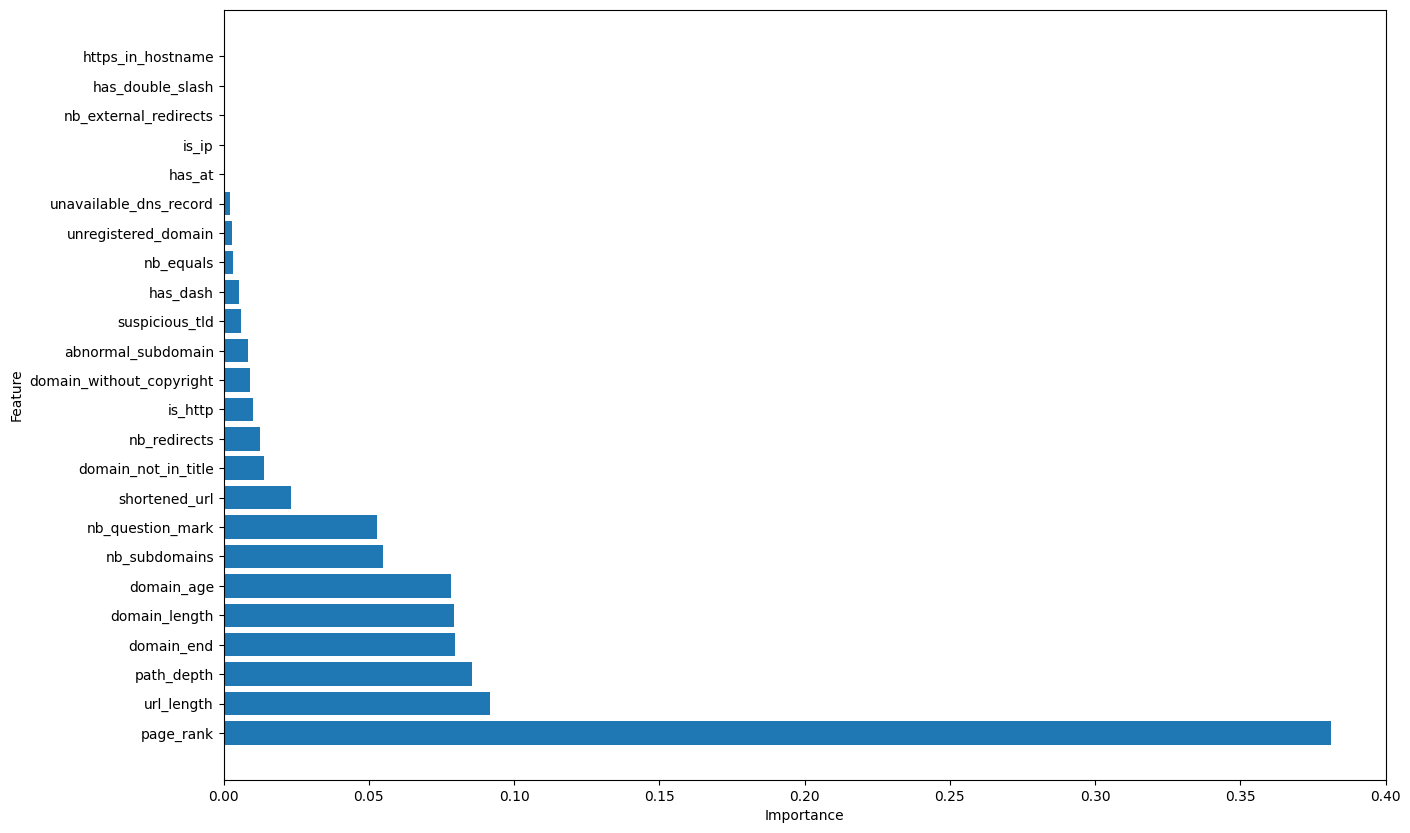

In [133]:
plot_feature_importances(dt, X_train)

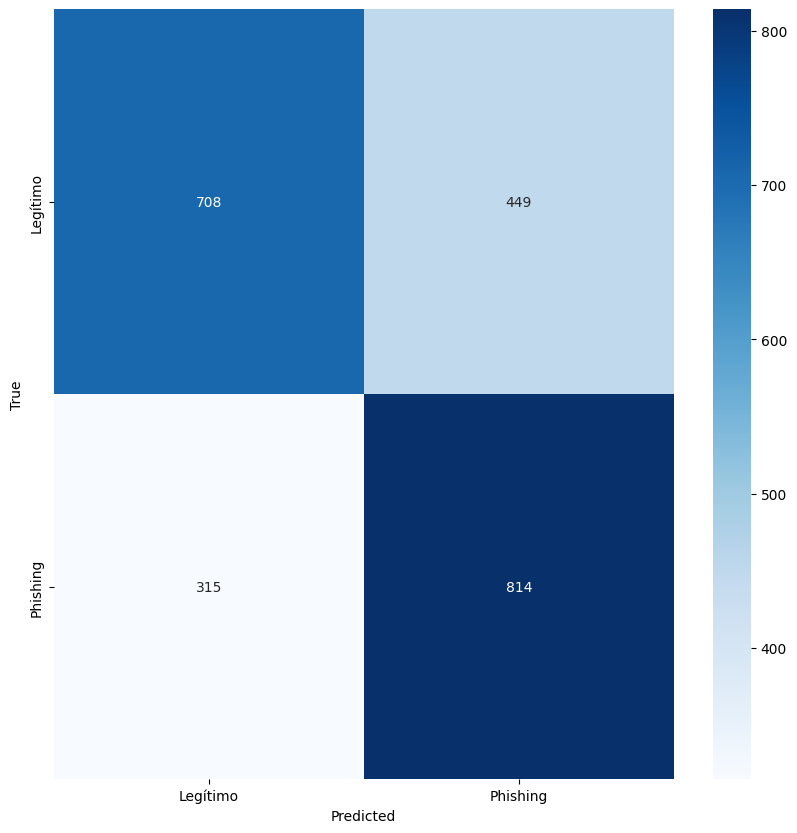

In [134]:
plot_confusion_matrix(y_test, y_test_pred)

### **6.6. Gaussian Naive Bayes**

In [135]:
# Train a gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [136]:
# Predictions
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)

In [137]:
# Compute and store the metrics
store_results('Gaussian Naive Bayes', y_train_pred, y_test_pred)

Accuracy on training set: 70.57%
Accuracy on test set: 70.34%


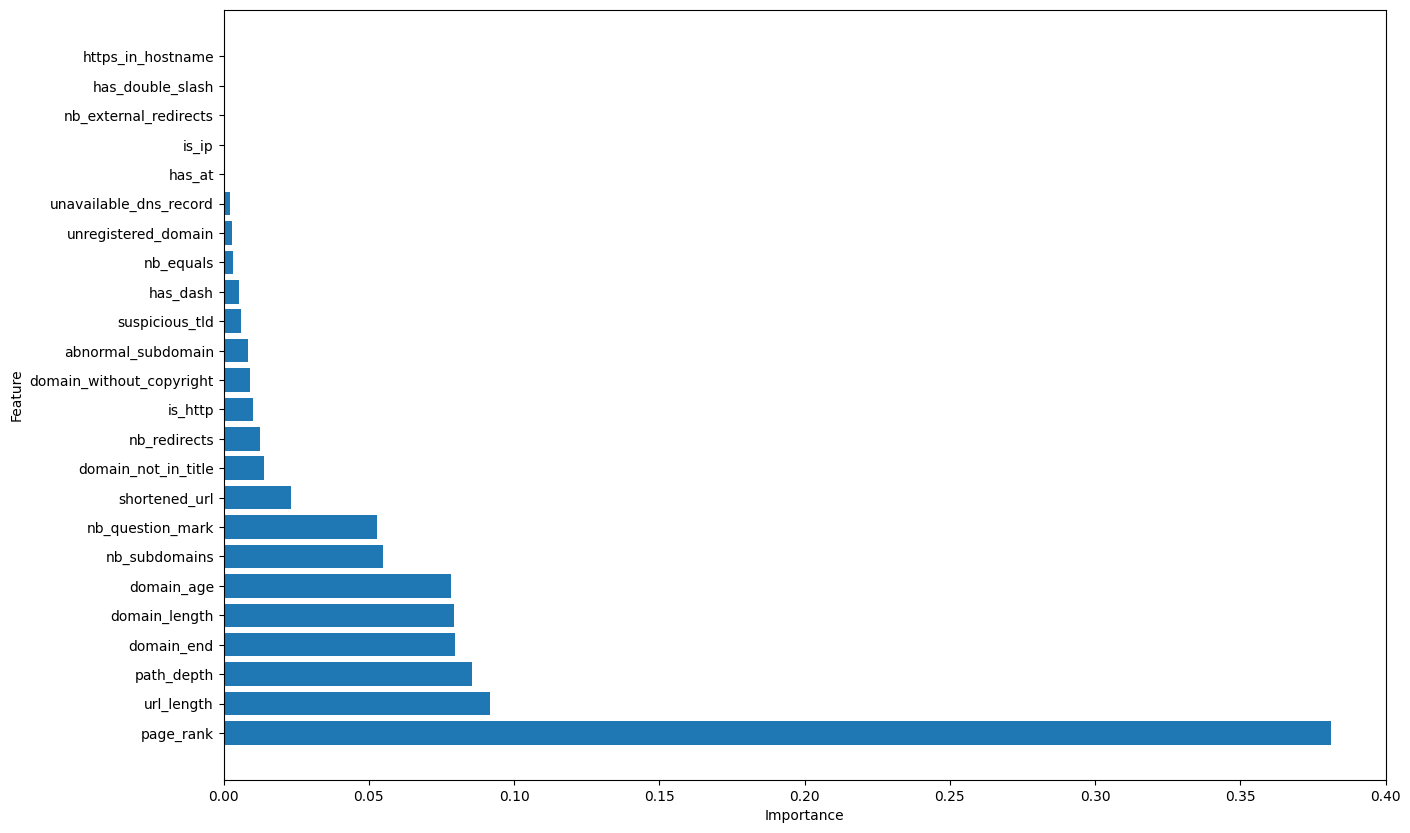

In [138]:
plot_feature_importances(dt, X_train)

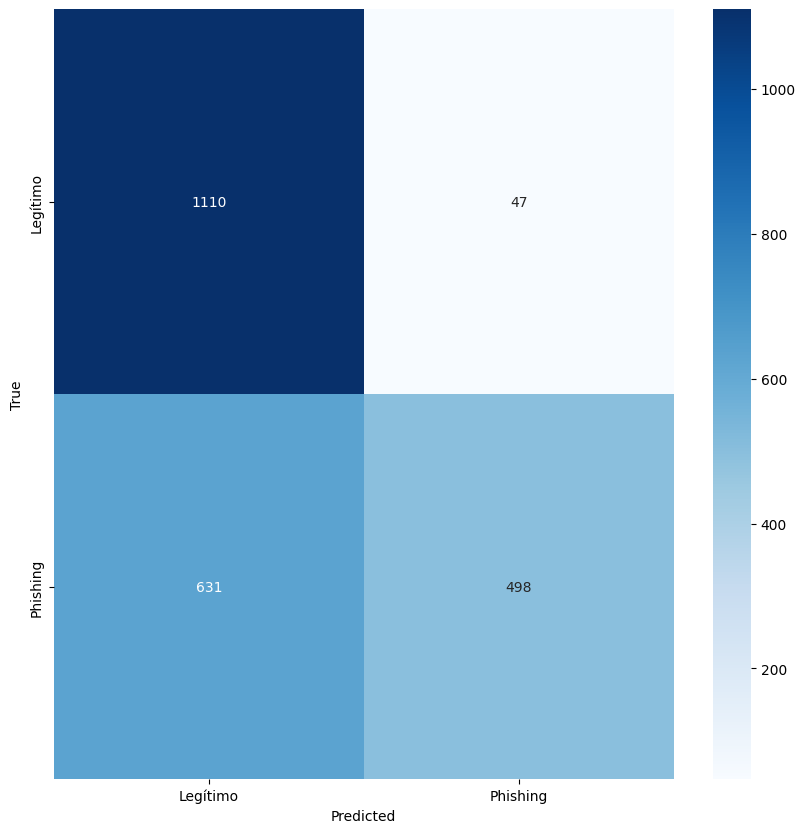

In [139]:
plot_confusion_matrix(y_test, y_test_pred)

## **7. Comparing Models**

To compare the models performance, a DataFrame is created. The columns of this
DataFrame are the lists created to store the results of the model.

In [140]:
results = pd.DataFrame(
    {
        'Model': models,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
    }
)
results


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,Decision Tree,0.999891,0.924759,0.918635,0.930027,0.924296
1,Random Forest,0.999891,0.944444,0.950540,0.936227,0.943329
2,Multi-Layer Perceptron,0.774606,0.783465,0.951567,0.591674,0.729656
3,XGBoost,0.986549,0.944882,0.938758,0.950399,0.944542
4,SVM,0.663276,0.665792,0.644497,0.720992,0.680602
5,Gaussian Naive Bayes,0.705709,0.703412,0.913761,0.441098,0.594982


In [141]:
# Sort the results by test accuracy
results.sort_values(by='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
3,XGBoost,0.986549,0.944882,0.938758,0.950399,0.944542
1,Random Forest,0.999891,0.944444,0.950540,0.936227,0.943329
0,Decision Tree,0.999891,0.924759,0.918635,0.930027,0.924296
2,Multi-Layer Perceptron,0.774606,0.783465,0.951567,0.591674,0.729656
5,Gaussian Naive Bayes,0.705709,0.703412,0.913761,0.441098,0.594982
4,SVM,0.663276,0.665792,0.644497,0.720992,0.680602


From the above comparison, it is clear that the XGBoost model is the best model
for this dataset.

In [142]:
# Save the model
import pickle

with open('XGBoostClassifier.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [143]:
# Testing the saved model
with open('XGBoostClassifier.pkl', 'rb') as f:
    model = pickle.load(f)

model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)